In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


**[IMDB데이터 사용해보기]**

In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17473536/17464789 [==============================] - 0s 0us/step


만들어진 멀티-핫 벡터 중 하나를 살펴 보기 >>단어 인덱스는 빈도 순으로 정렬되어 있음

그래프에서 볼 수 있듯이 인덱스 0에 가까울수록 1이 많이 등장

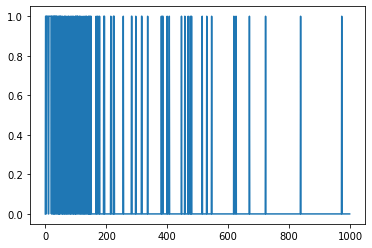

In [3]:
plt.plot(train_data[0])

In [4]:
####기준모델 만들기 [영화 리뷰 분류 네트워크]
#Dense층만 사용하는 간단한 기준모델 만들기 
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.5969 - accuracy: 0.7096 - binary_crossentropy: 0.5969 - val_loss: 0.4681 - val_accuracy: 0.8079 - val_binary_crossentropy: 0.4681 - 4s/epoch - 85ms/step
Epoch 2/20
49/49 - 1s - loss: 0.3950 - accuracy: 0.8380 - binary_crossentropy: 0.3950 - val_loss: 0.3570 - val_accuracy: 0.8512 - val_binary_crossentropy: 0.3570 - 507ms/epoch - 10ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3322 - accuracy: 0.8629 - binary_crossentropy: 0.3322 - val_loss: 0.3346 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3346 - 358ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3126 - accuracy: 0.8717 - binary_crossentropy: 0.3126 - val_loss: 0.3296 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3296 - 353ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3030 - accuracy: 0.8761 - binary_crossentropy: 0.3030 - val_loss: 0.3287 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3287 - 341ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2970 - accuracy: 0.8792 - binary_c

# **작은모델만들어보기**

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 4004      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
#같은데이터로 모델훈련해보기 
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6468 - accuracy: 0.6521 - binary_crossentropy: 0.6468 - val_loss: 0.5786 - val_accuracy: 0.7657 - val_binary_crossentropy: 0.5786 - 1s/epoch - 30ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5102 - accuracy: 0.8043 - binary_crossentropy: 0.5102 - val_loss: 0.4590 - val_accuracy: 0.8208 - val_binary_crossentropy: 0.4590 - 353ms/epoch - 7ms/step
Epoch 3/20
49/49 - 1s - loss: 0.4147 - accuracy: 0.8404 - binary_crossentropy: 0.4147 - val_loss: 0.3930 - val_accuracy: 0.8399 - val_binary_crossentropy: 0.3930 - 523ms/epoch - 11ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3648 - accuracy: 0.8529 - binary_crossentropy: 0.3648 - val_loss: 0.3615 - val_accuracy: 0.8499 - val_binary_crossentropy: 0.3615 - 364ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3389 - accuracy: 0.8625 - binary_crossentropy: 0.3389 - val_loss: 0.3468 - val_accuracy: 0.8556 - val_binary_crossentropy: 0.3468 - 384ms/epoch - 8ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3244 - accuracy: 0.8672 - binary_c

# **큰모델만들기**

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               512512    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
#큰데이터로 훈련하기
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4174 - accuracy: 0.8108 - binary_crossentropy: 0.4174 - val_loss: 0.3312 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3312 - 1s/epoch - 27ms/step
Epoch 2/20
49/49 - 1s - loss: 0.2908 - accuracy: 0.8804 - binary_crossentropy: 0.2908 - val_loss: 0.3263 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3263 - 583ms/epoch - 12ms/step
Epoch 3/20
49/49 - 0s - loss: 0.2284 - accuracy: 0.9085 - binary_crossentropy: 0.2284 - val_loss: 0.3409 - val_accuracy: 0.8549 - val_binary_crossentropy: 0.3409 - 468ms/epoch - 10ms/step
Epoch 4/20
49/49 - 0s - loss: 0.1170 - accuracy: 0.9641 - binary_crossentropy: 0.1170 - val_loss: 0.4394 - val_accuracy: 0.8422 - val_binary_crossentropy: 0.4394 - 465ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.0331 - accuracy: 0.9933 - binary_crossentropy: 0.0331 - val_loss: 0.5212 - val_accuracy: 0.8485 - val_binary_crossentropy: 0.5212 - 467ms/epoch - 10ms/step
Epoch 6/20
49/49 - 1s - loss: 0.0068 - accuracy: 0.9995 - binary

# **훈련손실과 검증손실 비교해보기**

In [10]:
#plot하는 함수 만들기 
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

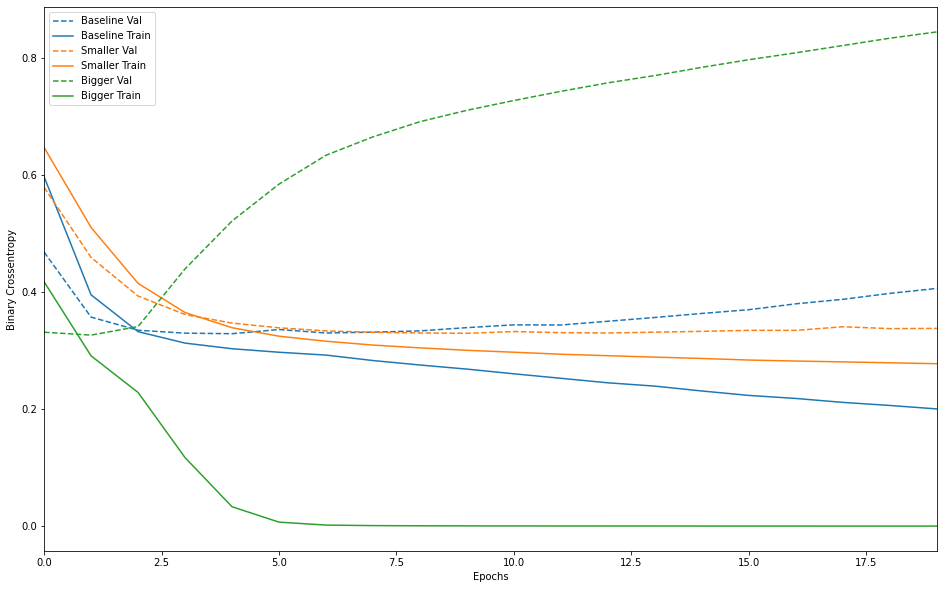

In [11]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

# **가중치 규제 해보기**

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6362 - accuracy: 0.7175 - binary_crossentropy: 0.5963 - val_loss: 0.5075 - val_accuracy: 0.8136 - val_binary_crossentropy: 0.4704 - 2s/epoch - 34ms/step
Epoch 2/20
49/49 - 1s - loss: 0.4334 - accuracy: 0.8409 - binary_crossentropy: 0.3965 - val_loss: 0.3957 - val_accuracy: 0.8520 - val_binary_crossentropy: 0.3588 - 656ms/epoch - 13ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3701 - accuracy: 0.8624 - binary_crossentropy: 0.3335 - val_loss: 0.3716 - val_accuracy: 0.8591 - val_binary_crossentropy: 0.3357 - 358ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3504 - accuracy: 0.8717 - binary_crossentropy: 0.3151 - val_loss: 0.3641 - val_accuracy: 0.8611 - val_binary_crossentropy: 0.3295 - 378ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3433 - accuracy: 0.8728 - binary_crossentropy: 0.3092 - val_loss: 0.3663 - val_accuracy: 0.8592 - val_binary_crossentropy: 0.3330 - 363ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3380 - accuracy: 0.8730 - binary_c

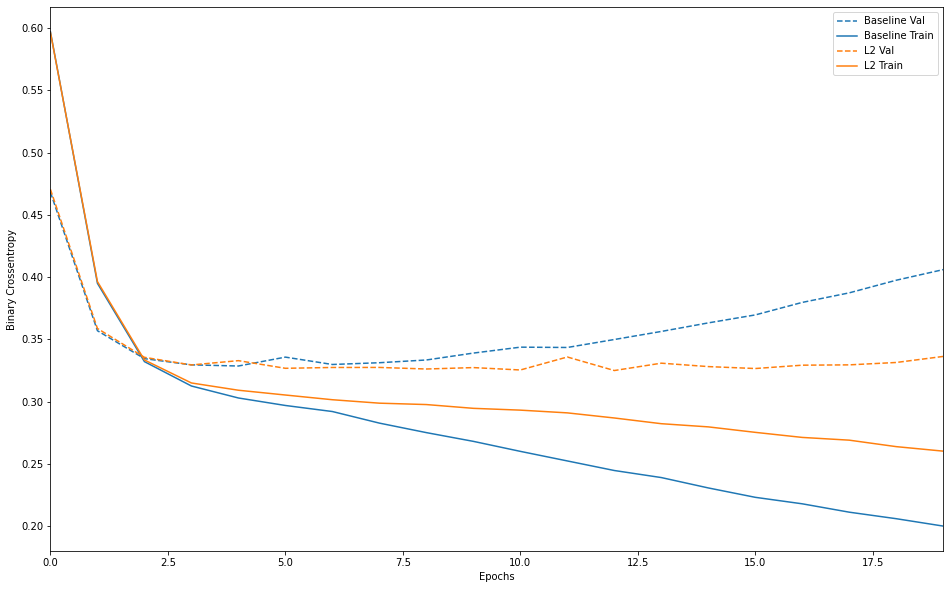

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

# **드롭아웃 추가해보기**

In [14]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6814 - accuracy: 0.5631 - binary_crossentropy: 0.6814 - val_loss: 0.6416 - val_accuracy: 0.6832 - val_binary_crossentropy: 0.6416 - 2s/epoch - 31ms/step
Epoch 2/20
49/49 - 1s - loss: 0.6119 - accuracy: 0.6790 - binary_crossentropy: 0.6119 - val_loss: 0.5183 - val_accuracy: 0.8142 - val_binary_crossentropy: 0.5183 - 517ms/epoch - 11ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5310 - accuracy: 0.7497 - binary_crossentropy: 0.5310 - val_loss: 0.4348 - val_accuracy: 0.8376 - val_binary_crossentropy: 0.4348 - 363ms/epoch - 7ms/step
Epoch 4/20
49/49 - 1s - loss: 0.4740 - accuracy: 0.7821 - binary_crossentropy: 0.4740 - val_loss: 0.3700 - val_accuracy: 0.8492 - val_binary_crossentropy: 0.3700 - 526ms/epoch - 11ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4272 - accuracy: 0.8171 - binary_crossentropy: 0.4272 - val_loss: 0.3476 - val_accuracy: 0.8558 - val_binary_crossentropy: 0.3476 - 368ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4023 - accuracy: 0.8302 - binary_

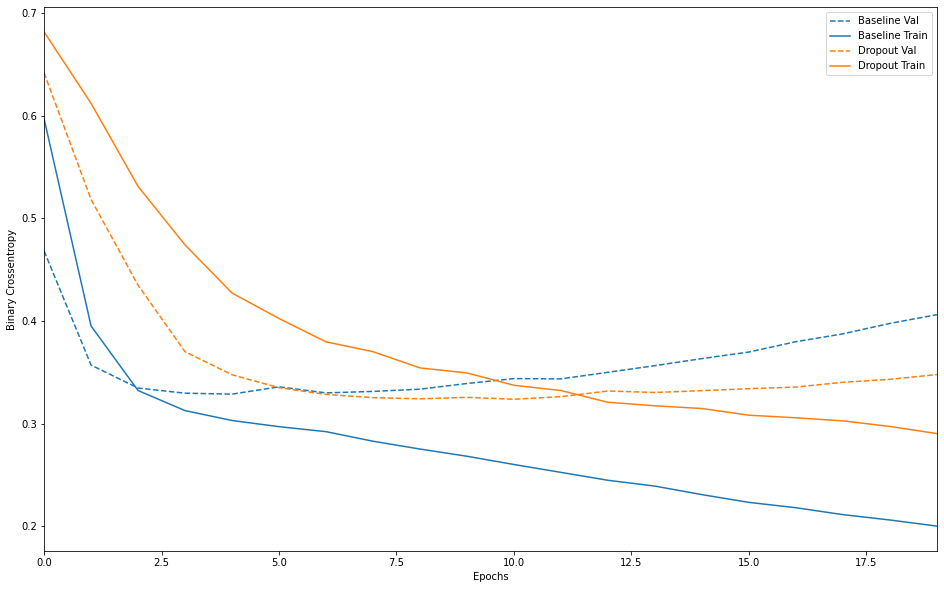

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])